# HWRS 564a Analysis Tools Homework 3

In this homework you will continue to build your python skills.

# Problem 1 - FizzBuzz

Write a program that prints the numbers from 1 to 100. But make it also do the following:
- for multiples of three print "Fizz" instead of the number 
- for the multiples of five print "Buzz" 
- For numbers which are multiples of both three and five print "FizzBuzz".

In [11]:
# I've set up the starter loop for you here
for n in range(1, 101):
    if n % 3 == 0 and n % 5 == 0:
        print("FizzBuzz")
    elif n % 3 == 0:
        print("Fizz")
    elif n % 5 == 0:
        print("Buzz")
    else:
        print(n)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


# Problem 2 - Fibonacci Sequence

Write a program that computes the Fibonacci sequence up to the n-th term, where n is provided by the user. The Fibonacci sequence is defined as follows:
- F(0) = 0
- F(1) = 1
- F(n) = F(n-1) + F(n-2) for n > 1


In [12]:
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        a, b = 0, 1
        for _ in range(2, n + 1):
            a, b = b, a + b
        return b    

n = 10
print(fibonacci(n))

55


# Problem 3 - List Intersection
Write a program that takes two lists as input and returns a new list containing only the elements that are common to both lists. 

In [13]:
a = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
b = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

# Create your code below this line to find the intersection of lists a and b
def both(list1, list2):
    return [value for value in set(list1) if value in list2]

print(both(a, b))

[1, 2, 3, 5, 8, 13]


# Problem 4 - Iris dataset analysis

Loading data - here I provide a dataset for you to work with for the first set of exercises

The iris dataset is a classic and very easy multi-class classification dataset. It describes measurments of sepal & petal width/length for three different species of iris.

Your task is to group by the 3 different species and take the mean across the whole dataframe. This will give you a single row for each species with the mean of each column.

In [14]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
d = load_iris()

# Create a DataFrame with species as the index
iris_df = pd.DataFrame(d['data'], columns=d['feature_names'])
iris_df.index = pd.Series(
    pd.Categorical.from_codes(d.target, d.target_names),
    name='species')

# Calculate the mean of each feature grouped by species
iris_df_mean = iris_df.groupby('species').mean()

print(iris_df_mean.head())


            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


/tmp/ipykernel_706/1966388239.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris_df_mean = iris_df.groupby('species').mean()


# Problem 5 - Plotting iris data
How do you make a scatter plot of the sepal length (cm) versus the petal length (cm) for the `versicolor`` species?

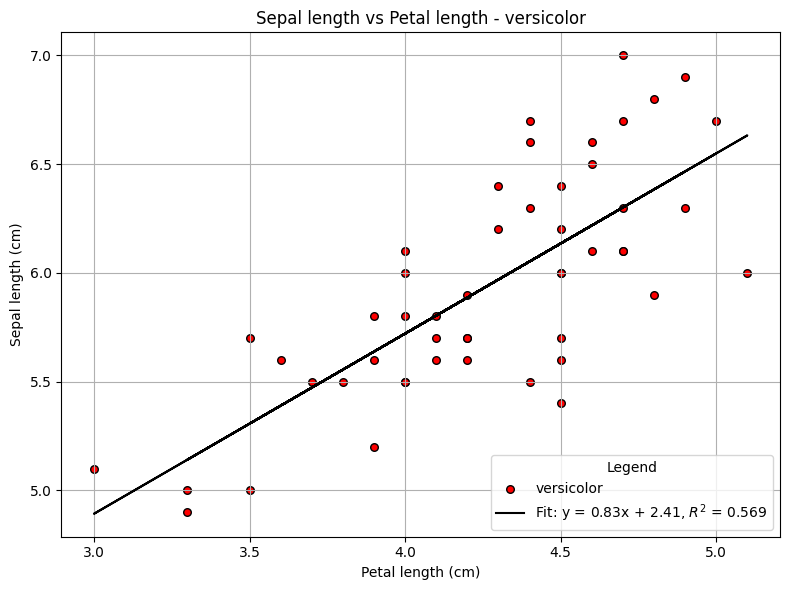

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define feature names
sepal = iris_df.columns[0].capitalize() # Sepal length column name 'sepal length (cm)'
petal = iris_df.columns[2].capitalize() # Petal length column name 'petal length (cm)'
species = iris_df.index.unique()[1] # Versicolor species name

# Extract data for versicolor species
versi = iris_df.loc[species]
x = versi[petal.lower()] # Petal length data
y = versi[sepal.lower()] # Sepal length data

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1) # get slope and intercept for 1st degree polynomial
linear_fit = np.poly1d(coefficients) # create a polynomial function

# Calculate R²
y_pred = linear_fit(x) # predicted y values from the linear fit
r2 = r2_score(y, y_pred) # R² calculation

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(
    x, # x-axis data bin
    y, # y-axis data bin
    label=species,
    color="red",
    edgecolor='black',
    s=30
)

# Plot the linear regression line
plt.plot(x, y_pred, color="black", label=f"Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}, $R^2$ = {r2:.3f}")

plt.title(f'{sepal[:-5]} vs {petal[:-5]} - {species}')
plt.xlabel(petal)
plt.ylabel(sepal)
plt.legend(title='Legend', loc='lower right')
plt.grid(True)
plt.tight_layout()